In [1]:
import numpy as np
import scipy.integrate as si

In [2]:
import matplotlib.pyplot as plt

# Motion in central potentials

In [3]:
# kepler bumps
f   = lambda sx,sy,x,y : -1/((x-sx)**2 + (y-sy)**2)**0.5
dfx = lambda sx,sy,x,y : (x-sx)/((x-sx)**2 + (y-sy)**2)**1.5
dfy = lambda sx,sy,x,y : (y-sy)/((x-sx)**2 + (y-sy)**2)**1.5

s1x, s1y = 0, 0.5
s2x, s2y = 0.5, -0.5
s3x, s3y = -0.5, -0.5

V1 = lambda x,y : f(0, 0, x, y)
V1p = lambda x,y : f(0, 0, x, y) + np.exp(-(x**2+y**2))

e = lambda V,x,y,vx,vy: (vx**2+vy**2)/2 + V(x,y)

In [4]:
def field1(t,y):
    x1,x2,v1,v2 = y
    dV_dx1 = dfx(0, 0, x1, x2)
    dV_dx2 = dfy(0, 0, x1, x2)
    return [ v1, v2, -dV_dx1, -dV_dx2 ]

def field1p(t,y):
    x1,x2,v1,v2 = y
    dV_dx1 = dfx(0, 0, x1, x2) - 2 * x1 * np.exp(-(x1**2+x2**2))
    dV_dx2 = dfy(0, 0, x1, x2) - 2 * x2 * np.exp(-(x1**2+x2**2))
    return [ v1, v2, -dV_dx1, -dV_dx2 ]

In [5]:
def kepler_plot(t0, tf, y0s, field = field1, V = V1, view=(-3,3,-3,3)):
    X1,X0=np.ogrid[view[2]:view[3]:100j,view[0]:view[1]:100j]
    t_span = [t0, tf]
    plt.figure(figsize=(12,12))
    plt.contour(X0.ravel(), X1.ravel(), V(X0,X1), colors='k', linewidths=0.3)

    # display grid and fix the coordinate ranges
    plt.grid()
    plt.autoscale(False)

    for y0 in y0s:
        E = e(V,*y0)
        sol = si.solve_ivp(field, t_span, y0, method="Radau", rtol=1e-6)
        plt.plot(sol.y[0], sol.y[1], label=f"{E:.4}", linewidth=2)

    plt.legend(loc='best')
    plt.show()

In [6]:
y0s = [(1,1,-0.15,-0.5), (1,1,0,-0.5), (1,1,-0.5,-0.25),
       (1,1, -2, -1) ]

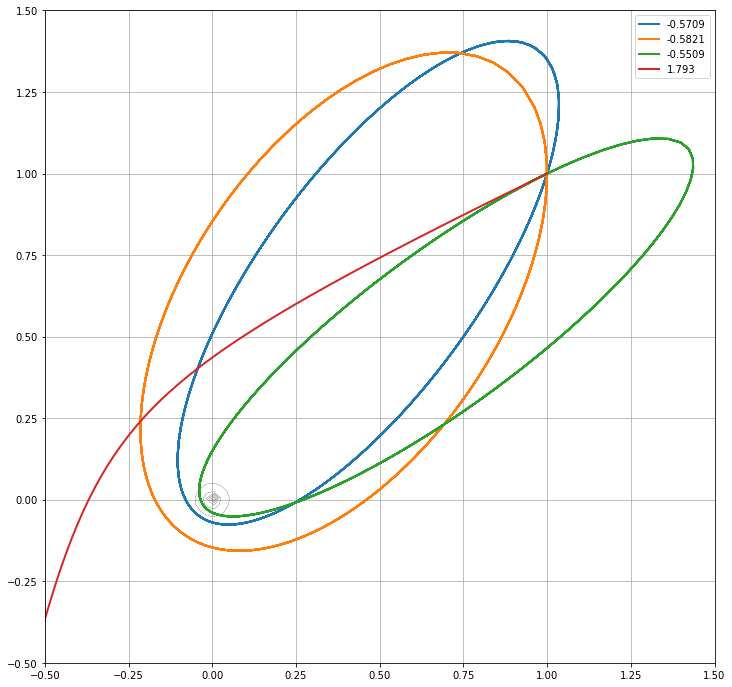

In [7]:
kepler_plot(0,30,y0s, view=(-0.5,1.5,-0.5,1.5))

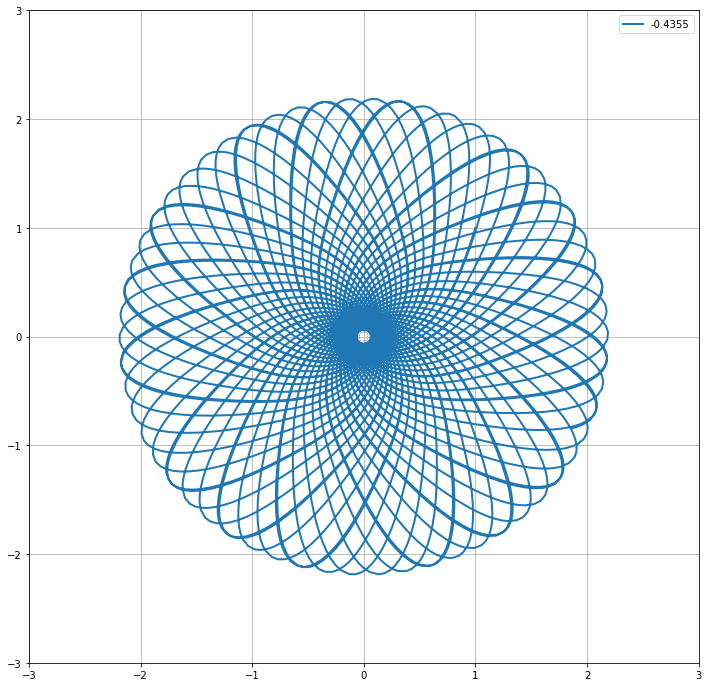

In [8]:
kepler_plot(0,750, y0s[0:1], field=field1p, V=V1p)

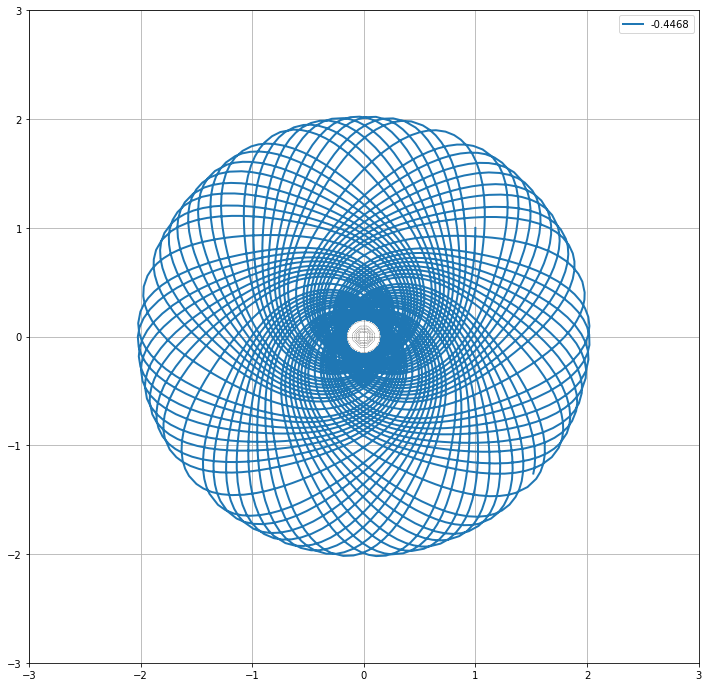

In [9]:
kepler_plot(0,700, y0s[1:2], field=field1p, V=V1p)

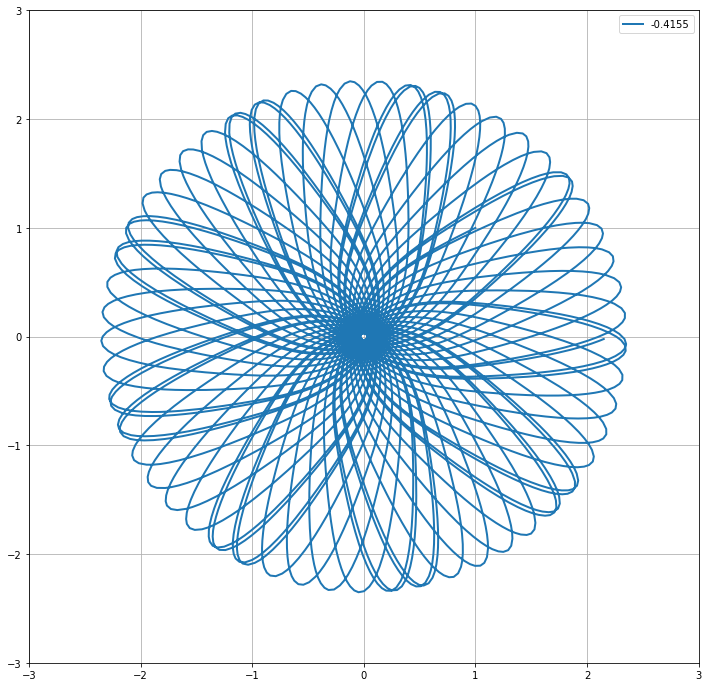

In [10]:
kepler_plot(0,700, y0s[2:3], field=field1p, V=V1p)

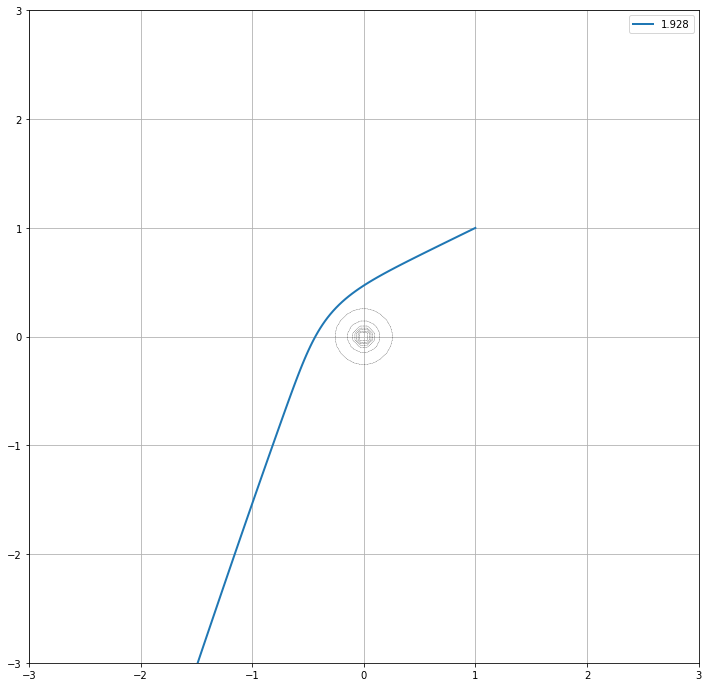

In [11]:
kepler_plot(0,10, y0s[3:4], field=field1p, V=V1p)

In [12]:
init_ecc = lambda e: (1.0 - e, 0.0 , 0.0, np.sqrt((1+e)/(1-e)))
y0s = [init_ecc(0.1), init_ecc(0.2), init_ecc(0.5), init_ecc(0.8)]

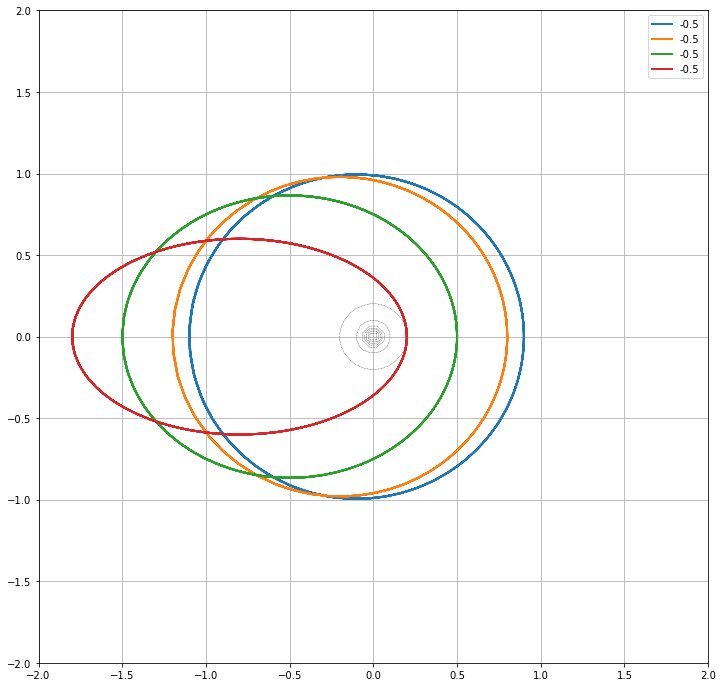

In [15]:
kepler_plot(0,30,y0s, view=(-2,2,-2,2))

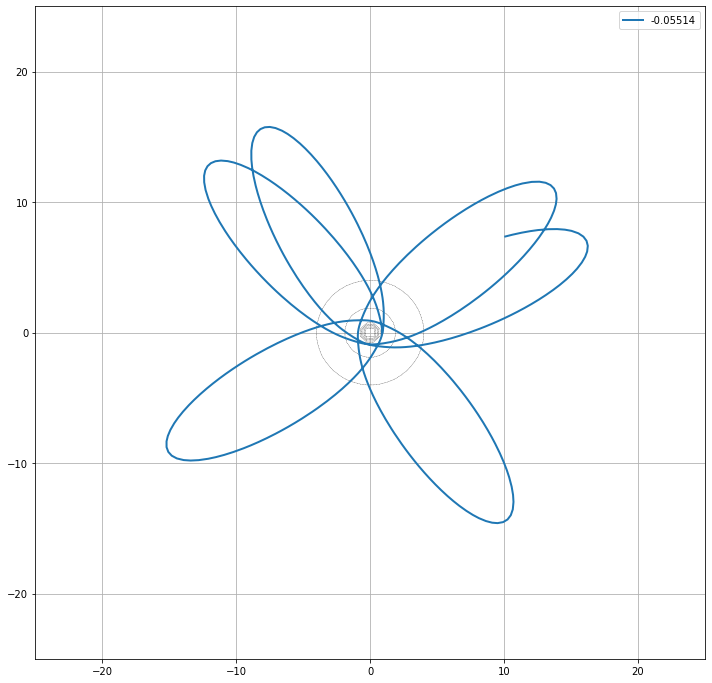

In [20]:
kepler_plot(0,1000, y0s[0:1], field=field1p, V=V1p, view=(-25,25,-25,25))